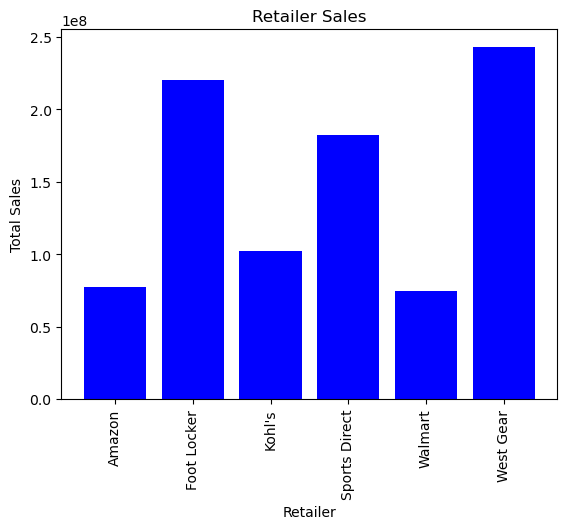

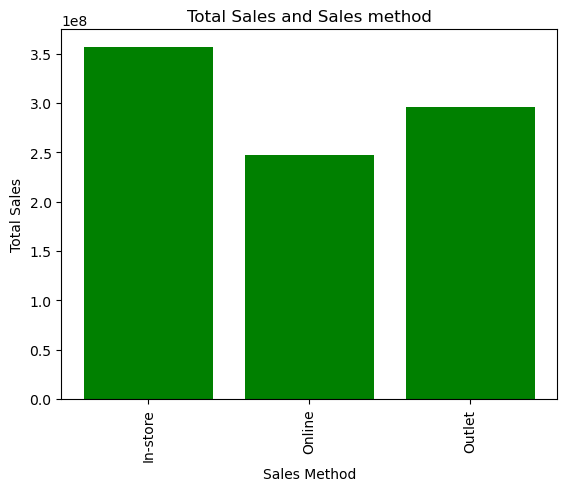

                            OLS Regression Results                            
Dep. Variable:            Total Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1602.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:17:50   Log-Likelihood:            -1.1607e+05
No. Observations:                9648   AIC:                         2.323e+05
Df Residuals:                    9580   BIC:                         2.328e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# In this project, I used adidas sales dataset from kaggle.

#approached analyzing sales performance across different regions, locations,cities units sold by retailers,
# Performed regression analysis to understand how independent variables affect total sales and units sold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # for regression


# Read the Adidas sales data from Kaggle
data = pd.read_csv('/kaggle/input/adidas-clean/adidas.csv')

# Group the data by retailer and calculate the total sales and units sold for each retailer
total_sales_units_by_retailer = data.groupby('Retailer').agg({'Total Sales': 'sum', 'Units Sold': 'sum'})
total_sales_units_by_salesMethod = data.groupby('Sales Method').agg({'Total Sales': 'sum', 'Units Sold': 'sum'})

# Create the histogram for retailer per sales
plt.bar(total_sales_units_by_retailer.index, total_sales_units_by_retailer['Total Sales'], color='blue')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Retailer Sales')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the retailer per sales histogram
plt.show()

# Create the histogram for units sold per total sales
plt.bar(total_sales_units_by_salesMethod.index, total_sales_units_by_salesMethod['Total Sales'], color='green')
plt.xlabel('Sales Method')
plt.ylabel('Total Sales')
plt.title('Total Sales and Sales method')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the units sold per total sales histogram
plt.show()

# Select the relevant columns for regression analysis
df = data[['Total Sales', 'Retailer','Region','State','City', 'Product','Price per Unit', 'Units Sold','Sales Method']]

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Define the dependent variable (Y) and independent variables (X)
# Model 1 aims to identify the relationship between the independent variables  and the total sales. 
Y = df['Total Sales']
X = df.drop('Total Sales', axis=1)
# Model 2 aims to identify the relationship between the independent variables and the units sold.
Y1 =df['Units Sold']
X1 =df.drop('Units Sold', axis=1)

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(Y, X).fit()

# Print the regression summary
print(model.summary())

X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session